In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
directory = 'Daten/cleaned_data'

aggregated_data = pd.DataFrame()

# Durchlaufe jede CSV-Datei im Verzeichnis
for filename in os.listdir(directory):
    if

In [36]:
df_gastro = pd.read_csv("Daten/cleaned_data/gastro_filtered.csv")
df_weather = pd.read_csv("Daten/cleaned_data/377_produkt_klima_tag.csv")
df_camping = pd.read_csv("Daten/cleaned_data/Gastro_Filter_v2.csv")
df_camping = df_camping[df_camping['Gastro_Description'] == 'Campingplätze']
df_camping['Datum'] = pd.to_datetime(df_camping['Datum'])
df_camping.set_index('Datum', inplace=True)
df_camping


,Gastro_Id,Gastro_Description,Umsatz in millionen
Datum,,,
1994-01-01,WZ08-553,Campingplätze,68.4
1994-02-01,WZ08-553,Campingplätze,52.2
1994-03-01,WZ08-553,Campingplätze,81.8
1994-04-01,WZ08-553,Campingplätze,119.4
1994-05-01,WZ08-553,Campingplätze,99.7
...,...,...,...
2023-09-01,WZ08-553,Campingplätze,146.8
2023-10-01,WZ08-553,Campingplätze,96.1
2023-11-01,WZ08-553,Campingplätze,45.3


In [25]:
df_gastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3971 non-null   int64  
 1   Jahr                 3971 non-null   int64  
 2   Monatscode           3971 non-null   object 
 3   Monat                3971 non-null   object 
 4   Gastro_Id            3971 non-null   object 
 5   Gastro_Description   3971 non-null   object 
 6   Umsatz in millionen  3971 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 217.3+ KB


In [26]:
df_gastro

,ID,Jahr,Monatscode,Monat,Gastro_Id,Gastro_Description,Umsatz in millionen
0,0,1994,MONAT01,Januar,WZ08-55,Beherbergung,92.3
1,1,1994,MONAT01,Januar,WZ08-551,"Hotels, Gasthöfe und Pensionen",91.9
2,2,1994,MONAT01,Januar,WZ08-552,Ferienunterkünfte u. ähnliche Beherbergungsstä...,97.3
3,3,1994,MONAT01,Januar,WZ08-553,Campingplätze,68.4
4,4,1994,MONAT01,Januar,WZ08-559,Sonstige Beherbergungsstätten,127.1
...,...,...,...,...,...,...,...
3966,3966,2024,MONAT01,Januar,WZ08-561,"Restaurants, Gaststätten, Imbissstuben, Cafes ...",76.6
3967,3967,2024,MONAT01,Januar,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,87.4
3968,3968,2024,MONAT01,Januar,WZ08-563,Ausschank von Getränken,52.0
3969,3969,2024,MONAT01,Januar,WZ08-561-01,Gaststättengewerbe,74.1


In [27]:
df_weather

,Unnamed: 0.1,Unnamed: 0,MESS_DATUM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,TMK,UPM,TXK,TNK,TGK
0,0,0,1947-01-01,0.0,0,2.0,6,6.3,5.9,0.2,93.00,3.7,-3.9,-999.0
1,1,1,1947-01-02,0.1,7,0.0,3,7.7,5.6,0.2,90.00,1.8,-3.5,-999.0
2,2,2,1947-01-03,0.0,0,0.0,3,6.0,6.0,0.9,90.00,2.7,-1.0,-999.0
3,3,3,1947-01-04,0.0,0,4.7,2,3.7,3.7,-4.7,81.00,1.5,-8.4,-999.0
4,4,4,1947-01-05,0.0,0,6.6,1,0.0,2.0,-10.6,70.00,-4.5,-12.2,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27471,27471,27473,2023-12-27,0.0,0,-999.0,0,-999.0,8.3,6.5,84.75,8.5,3.1,0.6
27472,27472,27474,2023-12-28,1.1,4,-999.0,0,-999.0,9.4,8.8,82.08,10.5,5.2,2.8
27473,27473,27475,2023-12-29,0.1,4,-999.0,0,-999.0,9.2,10.4,73.13,12.7,8.3,7.4
27474,27474,27476,2023-12-30,0.0,0,-999.0,0,-999.0,9.1,9.2,78.08,11.8,5.9,2.8


In [28]:
df_weather['Jahr'] = pd.to_datetime(df_weather['MESS_DATUM']).dt.year

df_weather['TMK']

0         0.2
1         0.2
2         0.9
3        -4.7
4       -10.6
         ... 
27471     6.5
27472     8.8
27473    10.4
27474     9.2
27475     6.4
Name: TMK, Length: 27476, dtype: float64

In [29]:
df_avg_temp_year = df_weather.groupby('Jahr')['TMK'].mean().reset_index()
df_avg_temp_year

,Jahr,TMK
0,1947,10.557808
1,1948,10.340437
2,1949,10.901644
3,1950,10.175890
4,1951,10.334521
...,...,...
71,2019,12.170411
72,2020,12.456284
73,2021,10.870959
74,2022,12.808767


In [30]:
merged_df = pd.merge(df_gastro, df_avg_temp_year, on='Jahr')
merged_df

,ID,Jahr,Monatscode,Monat,Gastro_Id,Gastro_Description,Umsatz in millionen,TMK
0,0,1994,MONAT01,Januar,WZ08-55,Beherbergung,92.3,11.383288
1,1,1994,MONAT01,Januar,WZ08-551,"Hotels, Gasthöfe und Pensionen",91.9,11.383288
2,2,1994,MONAT01,Januar,WZ08-552,Ferienunterkünfte u. ähnliche Beherbergungsstä...,97.3,11.383288
3,3,1994,MONAT01,Januar,WZ08-553,Campingplätze,68.4,11.383288
4,4,1994,MONAT01,Januar,WZ08-559,Sonstige Beherbergungsstätten,127.1,11.383288
...,...,...,...,...,...,...,...,...
3823,3955,2023,MONAT12,Dezember,WZ08-561,"Restaurants, Gaststätten, Imbissstuben, Cafes ...",94.3,12.753699
3824,3956,2023,MONAT12,Dezember,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,96.5,12.753699
3825,3957,2023,MONAT12,Dezember,WZ08-563,Ausschank von Getränken,70.1,12.753699
3826,3958,2023,MONAT12,Dezember,WZ08-561-01,Gaststättengewerbe,91.9,12.753699


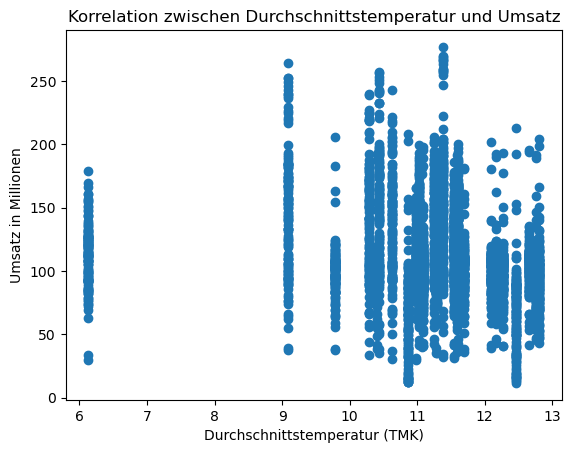

In [38]:
plt.scatter(merged_df['TMK'], merged_df['Umsatz in millionen'])
plt.title('Korrelation zwischen Durchschnittstemperatur und Umsatz')
plt.xlabel('Durchschnittstemperatur (TMK)')
plt.ylabel('Umsatz in Millionen')
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

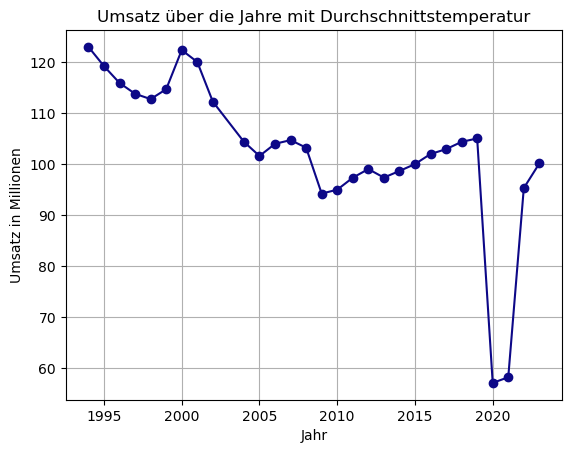

In [39]:
grouped = merged_df.groupby('Gastro_Id')

# Festlegen einer Farbskala basierend auf der Durchschnittstemperatur
cmap = plt.get_cmap('plasma')
colors = iter(cmap(np.linspace(0, 1, len(grouped))))

# Iterieren über jede einzigartige Gastro-ID und Erstellen eines Liniendiagramms für jede Gruppe
for name, group in grouped:
    # Gruppieren der Daten dieser Gastro-ID nach Jahr und Berechnen des Durchschnitts des Umsatzes und von TMK
    grouped_year = group.groupby('Jahr').agg({'Umsatz in millionen': 'mean', 'TMK': 'mean'}).reset_index()
    
    # Erstellen des Liniendiagramms für diese Gastro-ID mit Farbskala basierend auf der Durchschnittstemperatur
    plt.plot(grouped_year['Jahr'], grouped_year['Umsatz in millionen'], marker='o', color=next(colors), label=f'Gastro-ID {name}')
    plt.title('Umsatz über die Jahre mit Durchschnittstemperatur')
    plt.xlabel('Jahr')
    plt.ylabel('Umsatz in Millionen')
    plt.grid(True)
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Durchschnittstemperatur')
    plt.legend()
    plt.show()


In [40]:
correlation = merged_df['Umsatz in millionen'].corr(merged_df['TMK'])

print("Korrelationskoeffizient zwischen Temperatur und Jahresumsatz:", correlation)


Korrelationskoeffizient zwischen Temperatur und Jahresumsatz: -0.17373881150325693


In [43]:
# Berechnen der Korrelation zwischen Durchschnittstemperatur und Umsatz der Campingplätze
correlation = df_gastro['Umsatz in millionen'].corr(merged_df['TMK'])
print("Korrelationskoeffizient zwischen Durchschnittstemperatur und Umsatz der Campingplätze:", correlation)

# Prüfen auf einen Zusammenhang mit zeitlicher Verzögerung
lags = range(1, 13)  # Mögliche Verzögerungen von 1 bis 12 Monaten
correlation_with_lags = []
for lag in lags:
    # Verzögerte Durchschnittstemperatur um `lag` Monate
    df_camping['TMK_delayed'] = merged_df['TMK'].shift(periods=lag)
    # Berechnen der Korrelation zwischen verzögerter Durchschnittstemperatur und Umsatz
    correlation_with_lags.append(df_camping['Umsatz in millionen'].corr(df_camping['TMK_delayed']))

# Ermitteln des Lags mit der höchsten Korrelation
max_correlation_index = np.argmax(correlation_with_lags)
lag_with_max_correlation = lags[max_correlation_index]
max_correlation = correlation_with_lags[max_correlation_index]

print("Maximale Korrelation mit Lag von", lag_with_max_correlation, "Monaten:", max_correlation)


Korrelationskoeffizient zwischen Durchschnittstemperatur und Umsatz der Campingplätze: -0.19711142207546697
Maximale Korrelation mit Lag von 1 Monaten: nan
